In [6]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,LSTM,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from functions import *
from functions import plotting

(2115, 22, 1000)
(2115, 22, 1000)
(2115, 1000)


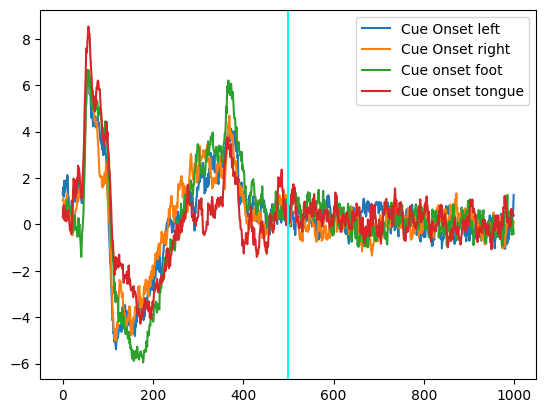

In [7]:
## Loading and visualizing the data

## Loading the dataset
X_test = np.load("../ECEC147project-data/X_test.npy")
y_test = np.load("../ECEC147project-data//y_test.npy")
person_train_valid = np.load("../ECEC147project-data//person_train_valid.npy")
X_train_valid = np.load("../ECEC147project-data/X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("../ECEC147project-data/y_train_valid.npy")
person_test = np.load("../ECEC147project-data/person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data
print(X_train_valid.shape)
ch_data = X_train_valid[:,8,:]
print(ch_data.shape)
class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)

plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

In [8]:
def train_data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    # print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    # print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    # print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    # print('Shape of X after subsampling and concatenating:',total_X.shape)
    # print('Shape of Y:',total_y.shape)
    return total_X,total_y



def test_data_prep(X):
    
    total_X = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,800)
    X = X[:,:,0:800]
    # print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,800) -> (sample,22,800/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, 2), axis=3)
    
    
    total_X = X_max
    # print('Shape of X after maxpooling:',total_X.shape)
    
    return total_X




# Question 1 Part 1
Optimize the classification accuracy for subject 1. Only trained on subject 1 data.

In [9]:
# Model parameters
learning_rate = 1e-3
epochs = 150

(237, 22, 1000)
(237,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 3s 76ms/step - loss: 1.3815 - accuracy: 0.2753 - val_loss: 1.4549 - val_accuracy: 0.2821
Epoch 2/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3551 - accuracy: 0.3270 - val_loss: 1.5000 - val_accuracy: 0.2821
Epoch 3/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3376 - accuracy: 0.3144 - val_loss: 1.5259 - val_accuracy: 0.2821
Epoch 4/150
13/13 [==============================] - 1s 57ms/step - loss: 1.2765 - accuracy: 0.3649 - val_loss: 1.5410 - val_accuracy: 0.2821
Epoch 5/150
13/13 [==============================] - 1s 56ms/step - loss: 1.2424 - accuracy: 0.3813 - val_loss: 1.4781 - val_accuracy: 0.2821
Epoch 6/150
13/13 [==============================] - 1s 56ms/step - loss: 1.1429 - accuracy: 0.4470 - val_loss: 1.3343 - val_accuracy: 0.2372
Epoch 7/150
13/13 [==============================] - 1s 57ms/step - loss: 1.1016 - accuracy: 0.4369 - val_loss: 1.1681 - val_accuracy: 0.3718
Epoch 

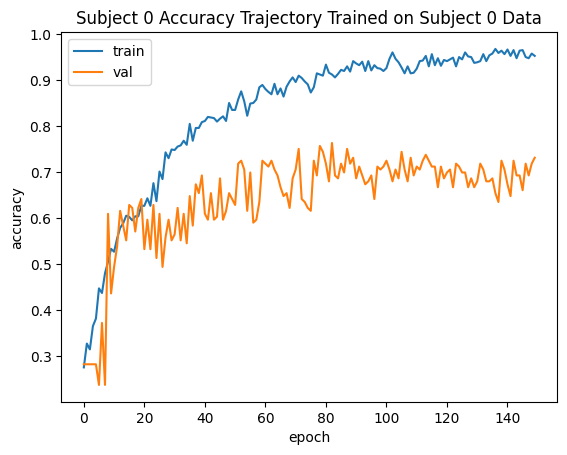

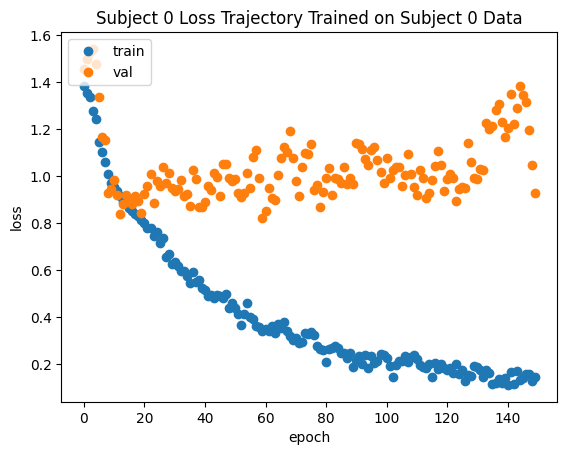

Test accuracy of the CNN model: 0.5799999833106995
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 86ms/step - loss: 1.3963 - accuracy: 0.2563 - val_loss: 1.3783 - val_accuracy: 0.3333
Epoch 2/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3824 - accuracy: 0.2741 - val_loss: 1.3675 - val_accuracy: 0.3269
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3615 - accuracy: 0.3033 - val_loss: 1.3638 - val_accuracy: 0.3782
Epoch 4/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3453 - accuracy: 0.3363 - val_loss: 1.3466 - val_accuracy: 0.4103
Epoch 5/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3438 - accuracy: 0.3439 - val_loss: 1.3301 - val_accuracy: 0.4103
Epoch 6/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3383 - accuracy: 0.3363 - val_loss: 1.3218 - val_accuracy: 0.4231
Epoch 7/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3262 - accuracy: 0.3439 - val_loss: 1.3081 - val_accuracy: 0.4423
Epoch 

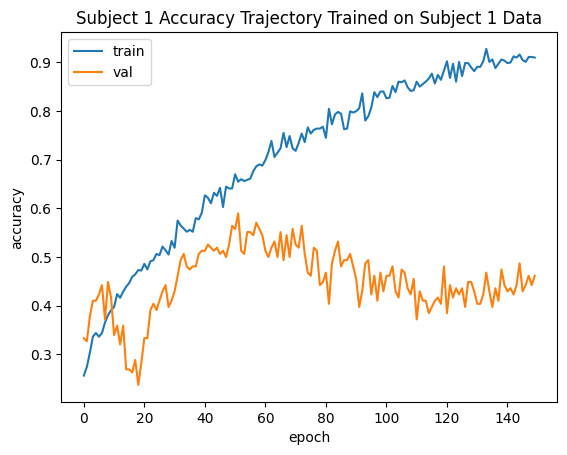

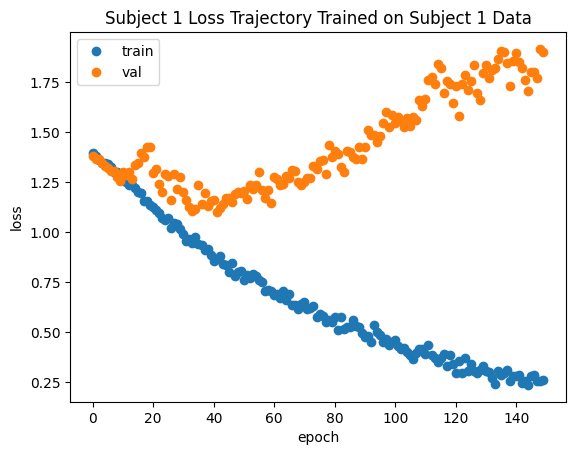

Test accuracy of the CNN model: 0.3799999952316284
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 3s 83ms/step - loss: 1.3849 - accuracy: 0.2589 - val_loss: 1.3916 - val_accuracy: 0.2308
Epoch 2/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3741 - accuracy: 0.2766 - val_loss: 1.3934 - val_accuracy: 0.2308
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3613 - accuracy: 0.3261 - val_loss: 1.3884 - val_accuracy: 0.2308
Epoch 4/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3535 - accuracy: 0.3338 - val_loss: 1.3781 - val_accuracy: 0.2821
Epoch 5/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3404 - accuracy: 0.3629 - val_loss: 1.3602 - val_accuracy: 0.3846
Epoch 6/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3235 - accuracy: 0.3642 - val_loss: 1.3309 - val_accuracy: 0.3462
Epoch 7/150
13/13 [==============================] - 1s 58ms/step - loss: 1.2982 - accuracy: 0.3693 - val_loss: 1.2941 - val_accuracy: 0.3397
Epoch 

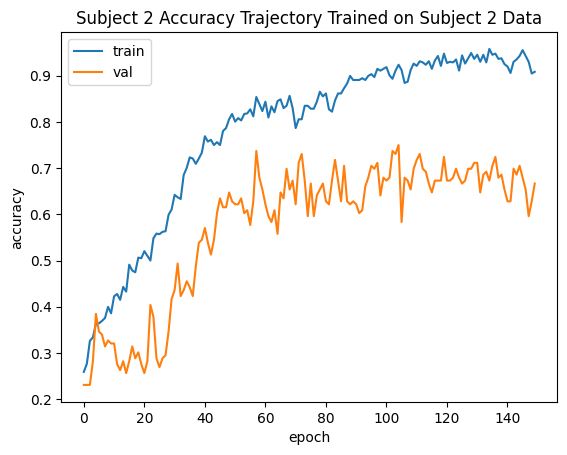

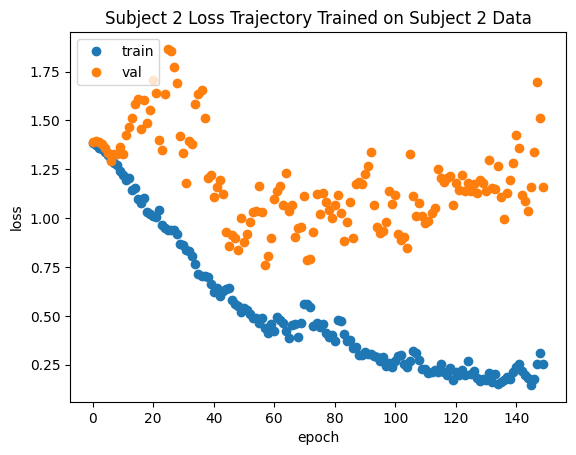

Test accuracy of the CNN model: 0.8199999928474426
(234, 22, 1000)
(234,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 3s 84ms/step - loss: 1.3848 - accuracy: 0.2769 - val_loss: 1.3768 - val_accuracy: 0.3077
Epoch 2/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3739 - accuracy: 0.3038 - val_loss: 1.3815 - val_accuracy: 0.2308
Epoch 3/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3651 - accuracy: 0.3269 - val_loss: 1.3780 - val_accuracy: 0.2308
Epoch 4/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3401 - accuracy: 0.3423 - val_loss: 1.3815 - val_accuracy: 0.2308
Epoch 5/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3334 - accuracy: 0.3718 - val_loss: 1.3925 - val_accuracy: 0.2308
Epoch 6/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3366 - accuracy: 0.3718 - val_loss: 1.3958 - val_accuracy: 0.2564
Epoch 7/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3019 - accuracy: 0.3910 - val_loss: 1.3593 - val_accuracy: 0.2692
Epoch 

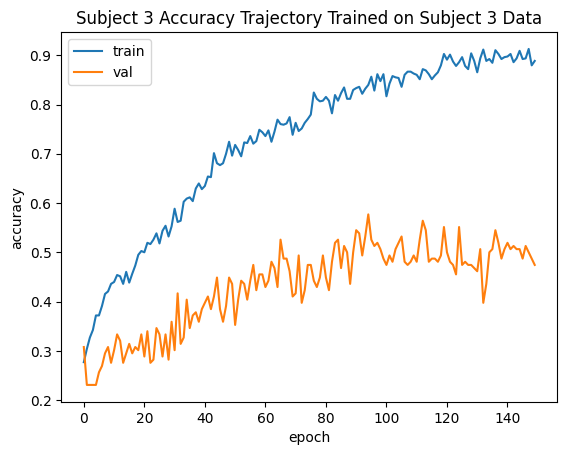

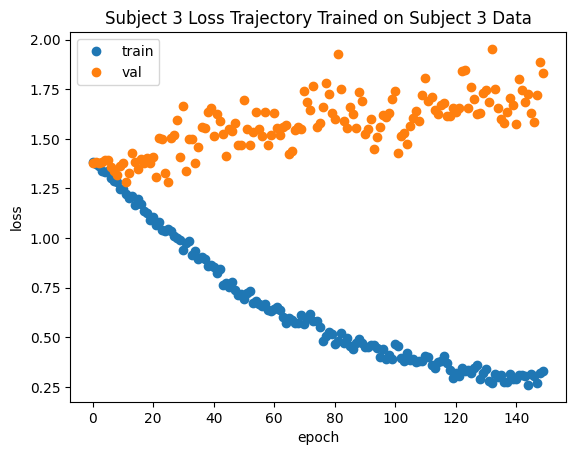

Test accuracy of the CNN model: 0.4000000059604645
(235, 22, 1000)
(235,)
(47, 22, 1000)
(47,)


Epoch 1/150
13/13 [==============================] - 2s 73ms/step - loss: 1.3873 - accuracy: 0.2602 - val_loss: 1.3755 - val_accuracy: 0.3590
Epoch 2/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3684 - accuracy: 0.3304 - val_loss: 1.3700 - val_accuracy: 0.3846
Epoch 3/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3674 - accuracy: 0.3214 - val_loss: 1.3665 - val_accuracy: 0.4231
Epoch 4/150
13/13 [==============================] - 1s 67ms/step - loss: 1.3553 - accuracy: 0.3457 - val_loss: 1.3554 - val_accuracy: 0.4295
Epoch 5/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3445 - accuracy: 0.3686 - val_loss: 1.3309 - val_accuracy: 0.4231
Epoch 6/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3238 - accuracy: 0.4043 - val_loss: 1.3266 - val_accuracy: 0.4038
Epoch 7/150
13/13 [==============================] - 1s 58ms/step - loss: 1.2970 - accuracy: 0.4401 - val_loss: 1.3077 - val_accuracy: 0.4295
Epoch 

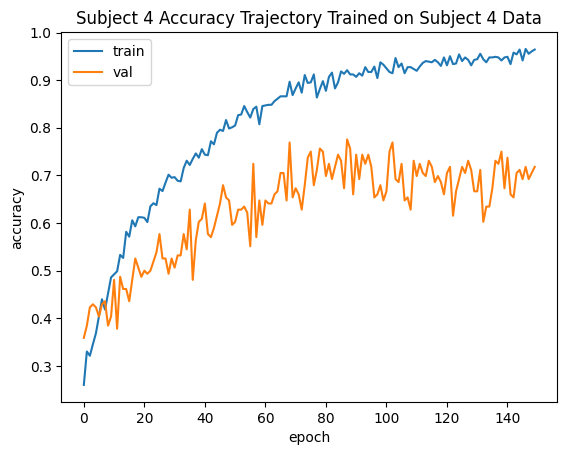

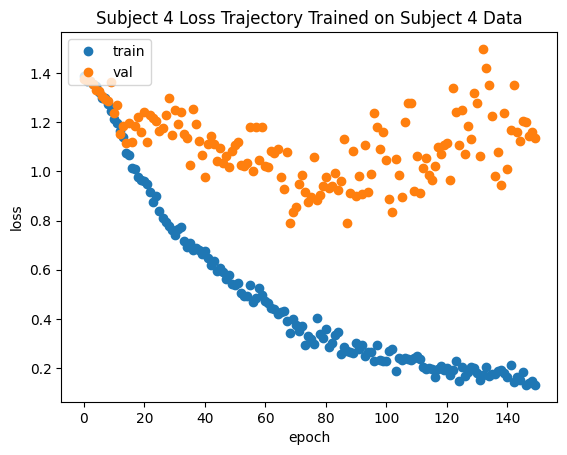

Test accuracy of the CNN model: 0.6595744490623474
(236, 22, 1000)
(236,)
(49, 22, 1000)
(49,)


Epoch 1/150
13/13 [==============================] - 3s 106ms/step - loss: 1.3917 - accuracy: 0.2576 - val_loss: 1.3848 - val_accuracy: 0.2564
Epoch 2/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3740 - accuracy: 0.2995 - val_loss: 1.3811 - val_accuracy: 0.2564
Epoch 3/150
13/13 [==============================] - 1s 63ms/step - loss: 1.3649 - accuracy: 0.3096 - val_loss: 1.3772 - val_accuracy: 0.2564
Epoch 4/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3460 - accuracy: 0.3350 - val_loss: 1.3778 - val_accuracy: 0.2564
Epoch 5/150
13/13 [==============================] - 1s 64ms/step - loss: 1.3322 - accuracy: 0.3490 - val_loss: 1.3811 - val_accuracy: 0.2885
Epoch 6/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3211 - accuracy: 0.3566 - val_loss: 1.3174 - val_accuracy: 0.3718
Epoch 7/150
13/13 [==============================] - 1s 64ms/step - loss: 1.2902 - accuracy: 0.3909 - val_loss: 1.2552 - val_accuracy: 0.3846
Epoch

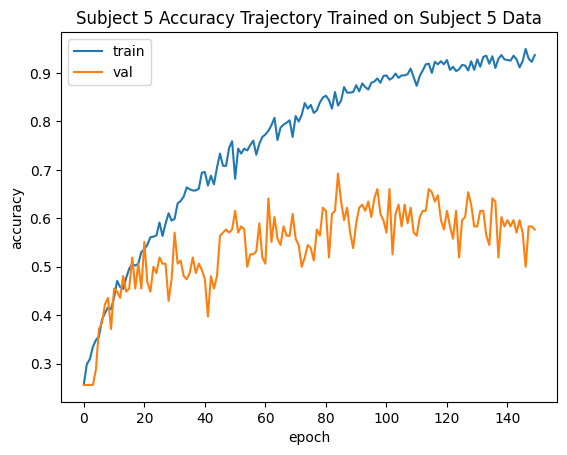

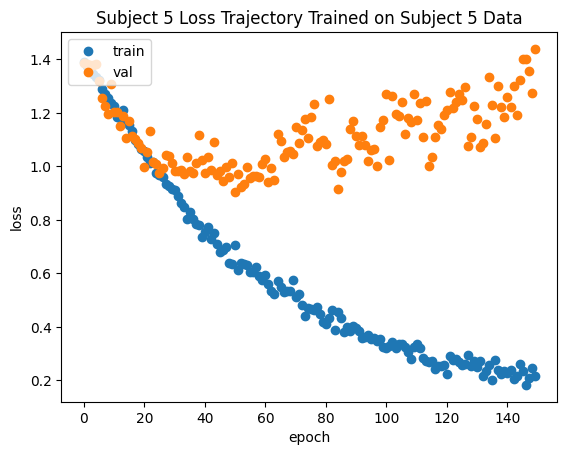

Test accuracy of the CNN model: 0.5306122303009033
(238, 22, 1000)
(238,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 76ms/step - loss: 1.3826 - accuracy: 0.2739 - val_loss: 1.3929 - val_accuracy: 0.2051
Epoch 2/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3728 - accuracy: 0.2852 - val_loss: 1.3973 - val_accuracy: 0.2179
Epoch 3/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3460 - accuracy: 0.3869 - val_loss: 1.3742 - val_accuracy: 0.3910
Epoch 4/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3146 - accuracy: 0.4095 - val_loss: 1.3030 - val_accuracy: 0.4103
Epoch 5/150
13/13 [==============================] - 1s 60ms/step - loss: 1.2707 - accuracy: 0.4246 - val_loss: 1.2582 - val_accuracy: 0.4038
Epoch 6/150
13/13 [==============================] - 1s 62ms/step - loss: 1.2466 - accuracy: 0.4497 - val_loss: 1.1927 - val_accuracy: 0.4103
Epoch 7/150
13/13 [==============================] - 1s 60ms/step - loss: 1.1810 - accuracy: 0.4786 - val_loss: 1.1287 - val_accuracy: 0.4103
Epoch 

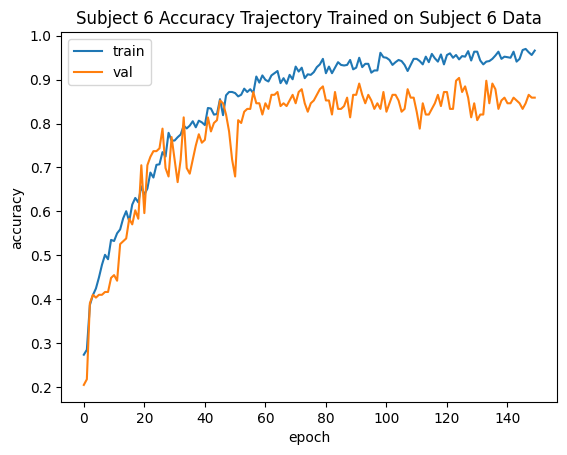

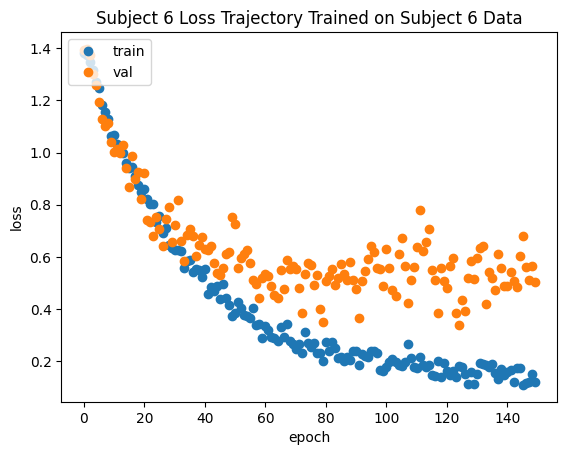

Test accuracy of the CNN model: 0.7400000095367432
(232, 22, 1000)
(232,)
(50, 22, 1000)
(50,)


Epoch 1/150
13/13 [==============================] - 2s 76ms/step - loss: 1.3912 - accuracy: 0.2668 - val_loss: 1.3833 - val_accuracy: 0.1447
Epoch 2/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3803 - accuracy: 0.2796 - val_loss: 1.3967 - val_accuracy: 0.2303
Epoch 3/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3724 - accuracy: 0.3183 - val_loss: 1.4101 - val_accuracy: 0.1645
Epoch 4/150
13/13 [==============================] - 1s 60ms/step - loss: 1.3534 - accuracy: 0.3325 - val_loss: 1.4121 - val_accuracy: 0.1645
Epoch 5/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3396 - accuracy: 0.3814 - val_loss: 1.4021 - val_accuracy: 0.2368
Epoch 6/150
13/13 [==============================] - 1s 57ms/step - loss: 1.3386 - accuracy: 0.3544 - val_loss: 1.4023 - val_accuracy: 0.2303
Epoch 7/150
13/13 [==============================] - 1s 58ms/step - loss: 1.3177 - accuracy: 0.3969 - val_loss: 1.4031 - val_accuracy: 0.2500
Epoch 

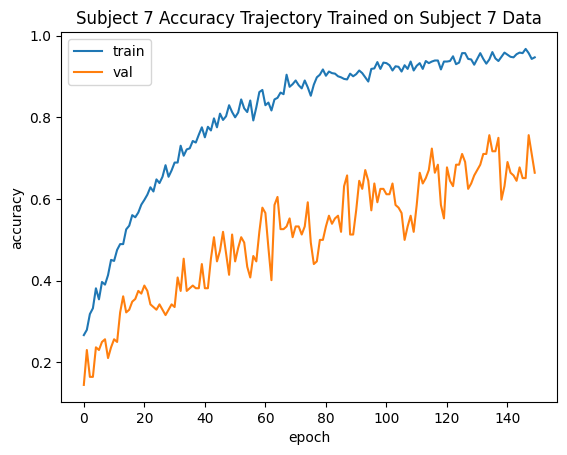

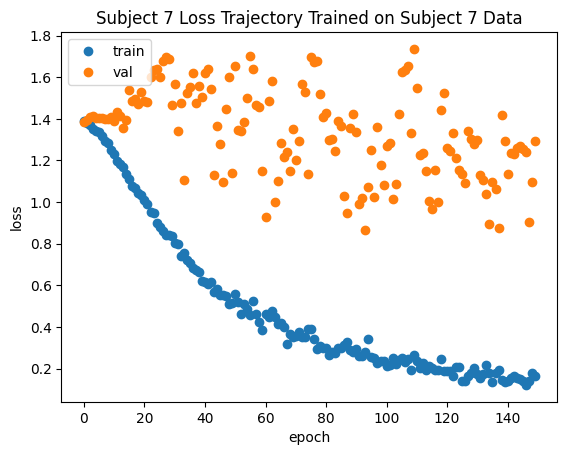

Test accuracy of the CNN model: 0.5199999809265137
(231, 22, 1000)
(231,)
(47, 22, 1000)
(47,)


Epoch 1/150
13/13 [==============================] - 2s 76ms/step - loss: 1.3895 - accuracy: 0.2422 - val_loss: 1.4297 - val_accuracy: 0.1053
Epoch 2/150
13/13 [==============================] - 1s 64ms/step - loss: 1.3661 - accuracy: 0.3083 - val_loss: 1.4526 - val_accuracy: 0.1053
Epoch 3/150
13/13 [==============================] - 1s 63ms/step - loss: 1.3458 - accuracy: 0.3381 - val_loss: 1.4772 - val_accuracy: 0.1053
Epoch 4/150
13/13 [==============================] - 1s 65ms/step - loss: 1.3175 - accuracy: 0.4106 - val_loss: 1.5006 - val_accuracy: 0.1053
Epoch 5/150
13/13 [==============================] - 1s 67ms/step - loss: 1.2934 - accuracy: 0.4067 - val_loss: 1.5191 - val_accuracy: 0.1053
Epoch 6/150
13/13 [==============================] - 1s 64ms/step - loss: 1.2611 - accuracy: 0.4482 - val_loss: 1.4844 - val_accuracy: 0.1382
Epoch 7/150
13/13 [==============================] - 1s 69ms/step - loss: 1.2260 - accuracy: 0.4806 - val_loss: 1.3825 - val_accuracy: 0.2434
Epoch 

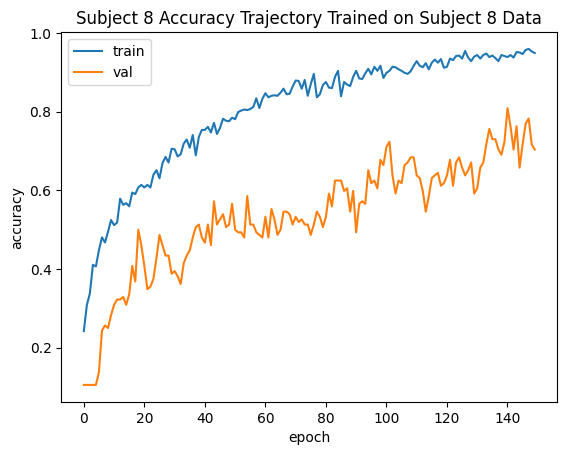

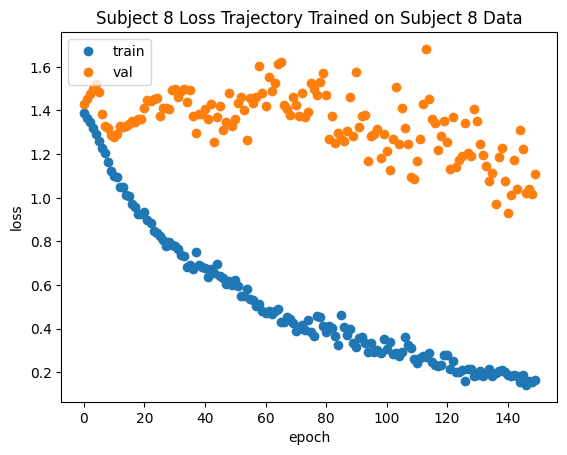

Test accuracy of the CNN model: 0.6808510422706604


In [10]:
for id in range(9):
    subject_train_valid_ind = np.where(person_train_valid == id)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == id)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]
    print(np.shape(subject_X_train_valid))
    print(np.shape(subject_y_train_valid))
    print(np.shape(subject_X_test))
    print(np.shape(subject_y_test))
    subject_X_test_prep = test_data_prep(subject_X_test) 
    ind_valid = np.random.choice(len(subject_X_train_valid), int(np.floor(len(subject_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(subject_X_train_valid))).difference(set(ind_valid))))
    (subject_x_train_split, subject_x_valid_split) = subject_X_train_valid[ind_train], subject_X_train_valid[ind_valid] 
    (subject_y_train_split, subject_y_valid_split) = subject_y_train_valid[ind_train], subject_y_train_valid[ind_valid]
    subject_x_train,subject_y_train = train_data_prep(subject_x_train_split,subject_y_train_split,2,2,True)
    subject_x_valid,subject_y_valid = train_data_prep(subject_x_valid_split,subject_y_valid_split,2,2,True)
    subject_y_train = to_categorical(subject_y_train, 4)
    subject_y_valid = to_categorical(subject_y_valid, 4)
    subject_y_test = to_categorical(subject_y_test, 4)
    subject_x_train = subject_x_train.reshape(subject_x_train.shape[0], subject_x_train.shape[1], subject_x_train.shape[2], 1)
    subject_x_valid = subject_x_valid.reshape(subject_x_valid.shape[0], subject_x_valid.shape[1], subject_x_train.shape[2], 1)
    subject_x_test = subject_X_test_prep.reshape(subject_X_test_prep.shape[0], subject_X_test_prep.shape[1], subject_X_test_prep.shape[2], 1)
    subject_x_train = np.swapaxes(subject_x_train, 1,3)
    subject_x_train = np.swapaxes(subject_x_train, 1,2)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,3)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,2)
    subject_x_test = np.swapaxes(subject_x_test, 1,3)
    subject_x_test = np.swapaxes(subject_x_test, 1,2)
    cnn_model = hybrid()
    # ADAM
    # Compiling the model
    hybrid_cnn_lstm_optimizer = keras.optimizers.Adam(lr=learning_rate)
    cnn_model.compile(loss='categorical_crossentropy',
                    optimizer=hybrid_cnn_lstm_optimizer,
                    metrics=['accuracy'])

    # Training and validating the model
    cnn_model_results = cnn_model.fit(subject_x_train,
                subject_y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(subject_x_valid, subject_y_valid), verbose=True)

    # Plotting accuracy trajectory
    plt.plot( cnn_model_results.history['accuracy'])
    plt.plot( cnn_model_results.history['val_accuracy'])
    plt.title('Subject ' + str(id) + ' Accuracy Trajectory Trained on Subject ' + str(id) + ' Data')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot( cnn_model_results.history['loss'],'o')
    plt.plot( cnn_model_results.history['val_loss'],'o')
    plt.title('Subject '  + str(id) + ' Loss Trajectory Trained on Subject '  + str(id) + ' Data')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()



    hybrid_cnn_lstm_score = cnn_model.evaluate(subject_x_test, subject_y_test, verbose=0)
    print('Test accuracy of the CNN model:',hybrid_cnn_lstm_score[1])
    

# Question 1 Part 2
 Does classification of one subject improve if the model is trained across all subjects?

(237, 22, 1000)
(237,)
(50, 22, 1000)
(50,)
(1878, 22, 1000)
(1878,)
(1878, 22, 1000)
(1878,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 59ms/step - loss: 1.3893 - accuracy: 0.2636 - val_loss: 1.3764 - val_accuracy: 0.3139
Epoch 2/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3648 - accuracy: 0.3162 - val_loss: 1.3045 - val_accuracy: 0.4013
Epoch 3/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3026 - accuracy: 0.3860 - val_loss: 1.2434 - val_accuracy: 0.4247
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2634 - accuracy: 0.4189 - val_loss: 1.2467 - val_accuracy: 0.4276
Epoch 5/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2219 - accuracy: 0.4451 - val_loss: 1.2682 - val_accuracy: 0.4112
Epoch 6/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2054 - accuracy: 0.4545 - val_loss: 1.2081 - val_accuracy: 0.4311
Epoch 7/150
111/111 [==============================] - 6s 55ms/step - loss: 1.

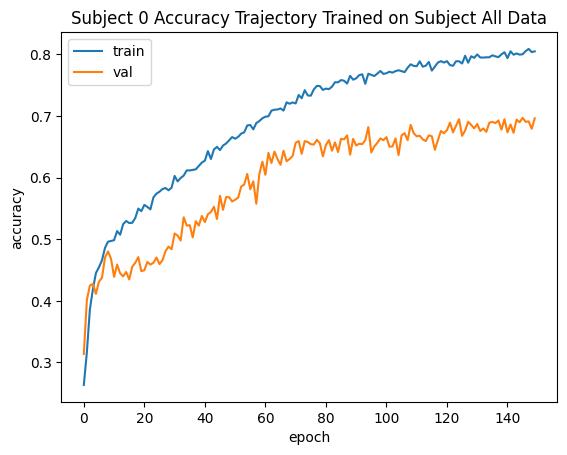

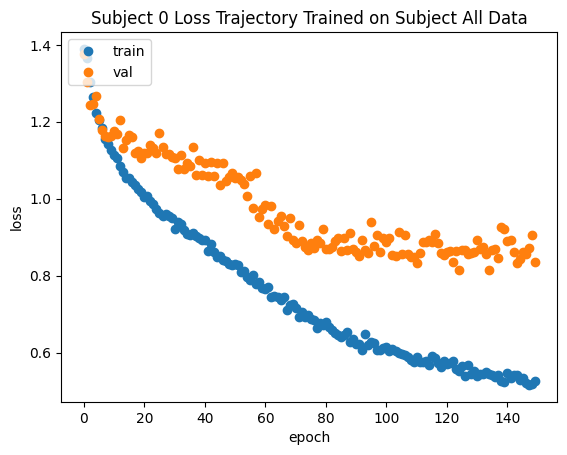

Test accuracy of the hybrid CNN-LSTM model: 0.6000000238418579
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)
(1879, 22, 1000)
(1879,)
(1879, 22, 1000)
(1879,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 57ms/step - loss: 1.3842 - accuracy: 0.2711 - val_loss: 1.3866 - val_accuracy: 0.2614
Epoch 2/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3502 - accuracy: 0.3210 - val_loss: 1.3742 - val_accuracy: 0.2947
Epoch 3/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3097 - accuracy: 0.3651 - val_loss: 1.3497 - val_accuracy: 0.3033
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2670 - accuracy: 0.4115 - val_loss: 1.3043 - val_accuracy: 0.3402
Epoch 5/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2330 - accuracy: 0.4325 - val_loss: 1.3030 - val_accuracy: 0.3878
Epoch 6/150
111/111 [==============================] - 6s 55ms/step - loss: 1.1977 - accuracy: 0.4529 - val_loss: 1.2126 - val_accuracy: 0.4247
Epoch 7/150
111/111 [==============================] - 6s 55ms/step - loss: 1.

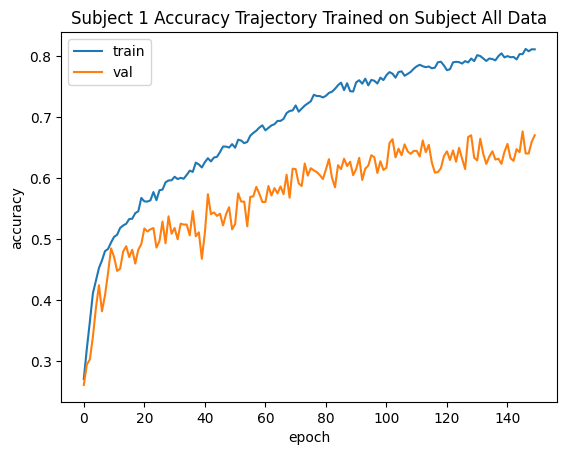

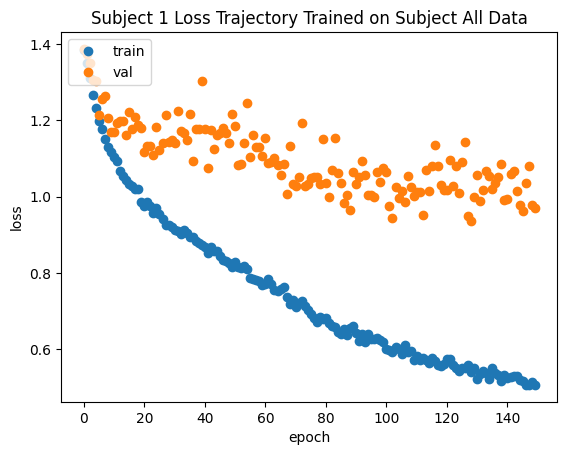

Test accuracy of the hybrid CNN-LSTM model: 0.5199999809265137
(236, 22, 1000)
(236,)
(50, 22, 1000)
(50,)
(1879, 22, 1000)
(1879,)
(1879, 22, 1000)
(1879,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 59ms/step - loss: 1.3763 - accuracy: 0.2853 - val_loss: 1.3556 - val_accuracy: 0.3331
Epoch 2/150
111/111 [==============================] - 6s 56ms/step - loss: 1.3434 - accuracy: 0.3269 - val_loss: 1.3018 - val_accuracy: 0.3864
Epoch 3/150
111/111 [==============================] - 6s 56ms/step - loss: 1.3086 - accuracy: 0.3535 - val_loss: 1.2451 - val_accuracy: 0.3871
Epoch 4/150
111/111 [==============================] - 6s 58ms/step - loss: 1.2790 - accuracy: 0.3856 - val_loss: 1.2121 - val_accuracy: 0.4197
Epoch 5/150
111/111 [==============================] - 6s 57ms/step - loss: 1.2509 - accuracy: 0.4151 - val_loss: 1.1690 - val_accuracy: 0.4425
Epoch 6/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2159 - accuracy: 0.4380 - val_loss: 1.1743 - val_accuracy: 0.4595
Epoch 7/150
111/111 [==============================] - 6s 56ms/step - loss: 1.

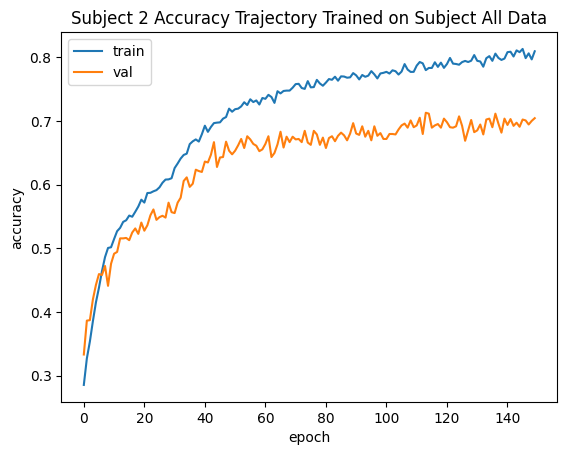

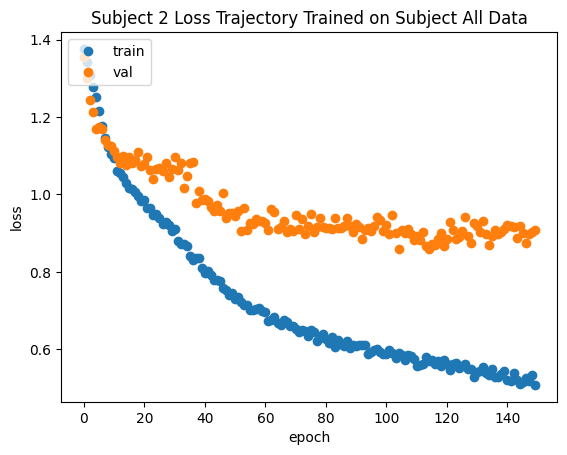

Test accuracy of the hybrid CNN-LSTM model: 0.8199999928474426
(234, 22, 1000)
(234,)
(50, 22, 1000)
(50,)
(1881, 22, 1000)
(1881,)
(1881, 22, 1000)
(1881,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 58ms/step - loss: 1.3676 - accuracy: 0.3037 - val_loss: 1.3483 - val_accuracy: 0.3374
Epoch 2/150
111/111 [==============================] - 6s 57ms/step - loss: 1.2993 - accuracy: 0.3746 - val_loss: 1.3177 - val_accuracy: 0.3991
Epoch 3/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2587 - accuracy: 0.4132 - val_loss: 1.2598 - val_accuracy: 0.4418
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2245 - accuracy: 0.4349 - val_loss: 1.2668 - val_accuracy: 0.4297
Epoch 5/150
111/111 [==============================] - 6s 55ms/step - loss: 1.1840 - accuracy: 0.4665 - val_loss: 1.2850 - val_accuracy: 0.4155
Epoch 6/150
111/111 [==============================] - 6s 56ms/step - loss: 1.1671 - accuracy: 0.4794 - val_loss: 1.2473 - val_accuracy: 0.4304
Epoch 7/150
111/111 [==============================] - 6s 57ms/step - loss: 1.

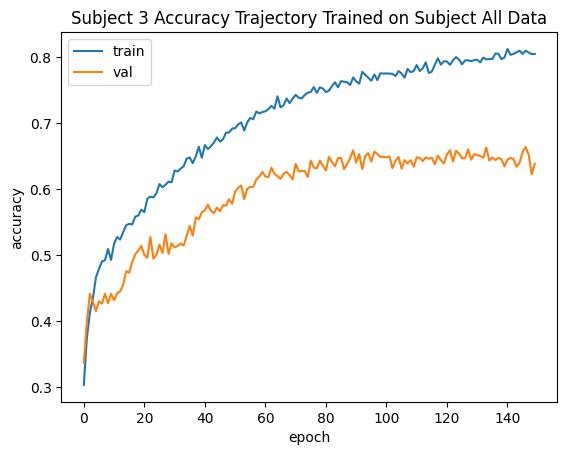

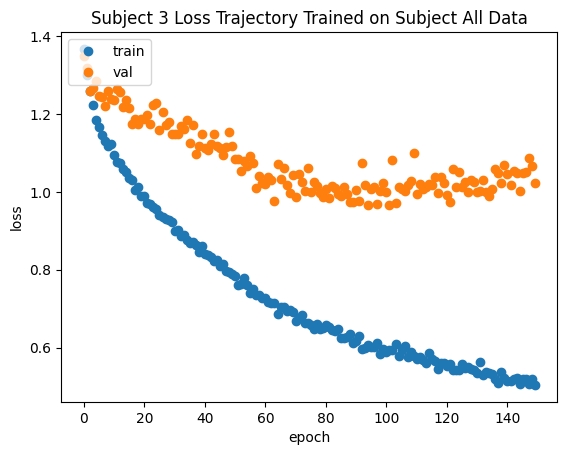

Test accuracy of the hybrid CNN-LSTM model: 0.6600000262260437
(235, 22, 1000)
(235,)
(47, 22, 1000)
(47,)
(1880, 22, 1000)
(1880,)
(1880, 22, 1000)
(1880,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 57ms/step - loss: 1.3795 - accuracy: 0.2811 - val_loss: 1.3636 - val_accuracy: 0.3054
Epoch 2/150
111/111 [==============================] - 6s 56ms/step - loss: 1.3347 - accuracy: 0.3452 - val_loss: 1.3308 - val_accuracy: 0.3260
Epoch 3/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2895 - accuracy: 0.3927 - val_loss: 1.2841 - val_accuracy: 0.4134
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2418 - accuracy: 0.4319 - val_loss: 1.2637 - val_accuracy: 0.4290
Epoch 5/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2133 - accuracy: 0.4525 - val_loss: 1.1848 - val_accuracy: 0.4467
Epoch 6/150
111/111 [==============================] - 6s 57ms/step - loss: 1.1810 - accuracy: 0.4742 - val_loss: 1.1969 - val_accuracy: 0.4588
Epoch 7/150
111/111 [==============================] - 6s 55ms/step - loss: 1.

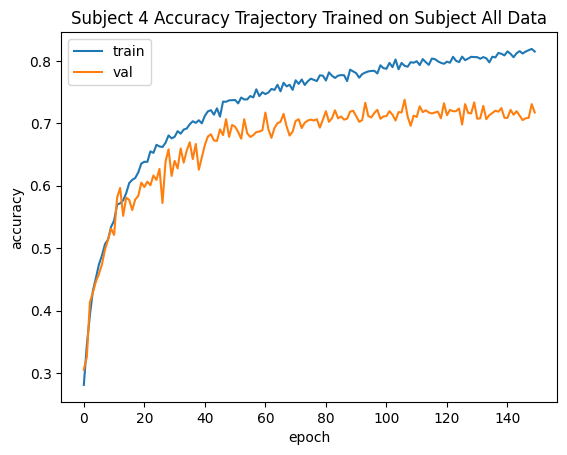

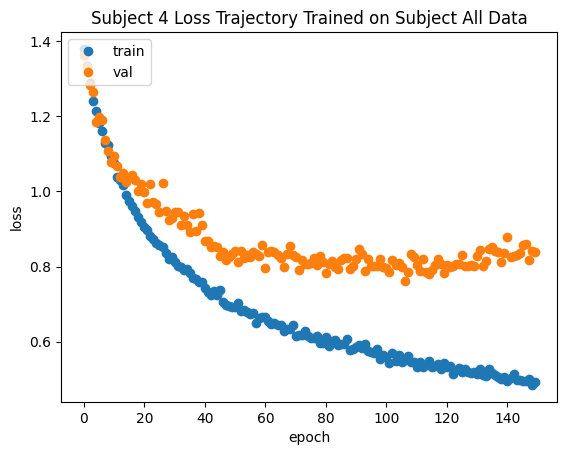

Test accuracy of the hybrid CNN-LSTM model: 0.7659574747085571
(236, 22, 1000)
(236,)
(49, 22, 1000)
(49,)
(1879, 22, 1000)
(1879,)
(1879, 22, 1000)
(1879,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 57ms/step - loss: 1.3796 - accuracy: 0.2778 - val_loss: 1.3573 - val_accuracy: 0.3345
Epoch 2/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3430 - accuracy: 0.3335 - val_loss: 1.3143 - val_accuracy: 0.3693
Epoch 3/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2941 - accuracy: 0.3769 - val_loss: 1.3327 - val_accuracy: 0.3402
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2541 - accuracy: 0.4105 - val_loss: 1.2659 - val_accuracy: 0.4134
Epoch 5/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2288 - accuracy: 0.4390 - val_loss: 1.2602 - val_accuracy: 0.4055
Epoch 6/150
111/111 [==============================] - 6s 56ms/step - loss: 1.1994 - accuracy: 0.4524 - val_loss: 1.2518 - val_accuracy: 0.4389
Epoch 7/150
111/111 [==============================] - 6s 55ms/step - loss: 1.

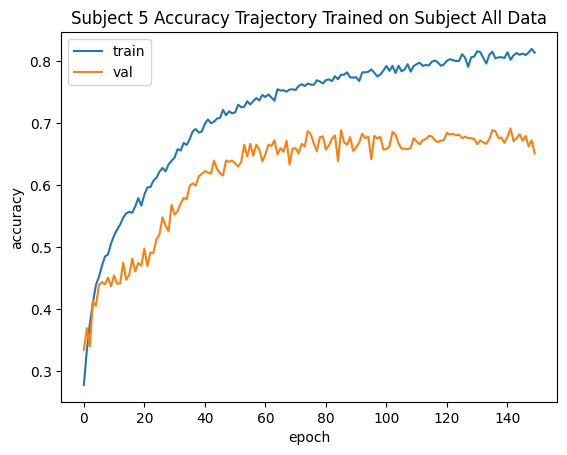

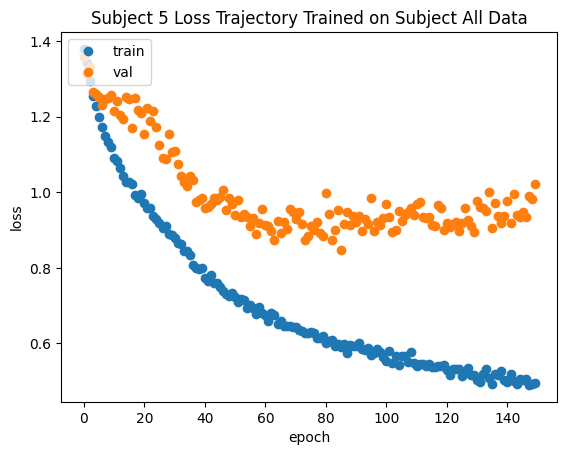

Test accuracy of the hybrid CNN-LSTM model: 0.7142857313156128
(238, 22, 1000)
(238,)
(50, 22, 1000)
(50,)
(1877, 22, 1000)
(1877,)
(1877, 22, 1000)
(1877,)


(7056, 400, 1, 22)
(1404, 400, 1, 22)
(7056, 4)
(1404, 4)
Epoch 1/150
111/111 [==============================] - 8s 58ms/step - loss: 1.3843 - accuracy: 0.2700 - val_loss: 1.3416 - val_accuracy: 0.4024
Epoch 2/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3524 - accuracy: 0.3302 - val_loss: 1.2757 - val_accuracy: 0.4202
Epoch 3/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2918 - accuracy: 0.3968 - val_loss: 1.3045 - val_accuracy: 0.3825
Epoch 4/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2437 - accuracy: 0.4426 - val_loss: 1.1940 - val_accuracy: 0.4494
Epoch 5/150
111/111 [==============================] - 6s 54ms/step - loss: 1.2155 - accuracy: 0.4576 - val_loss: 1.2408 - val_accuracy: 0.4288
Epoch 6/150
111/111 [==============================] - 6s 55ms/step - loss: 1.1916 - accuracy: 0.4683 - val_loss: 1.1686 - val_accuracy: 0.4608
Epoch 7/150
111/111 [==============================] - 6s 55ms/step - loss: 1.

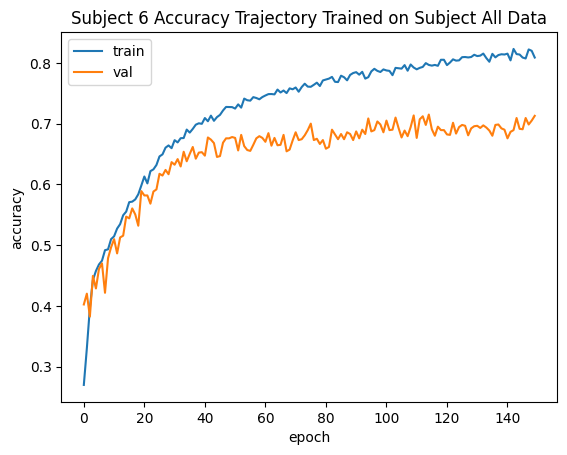

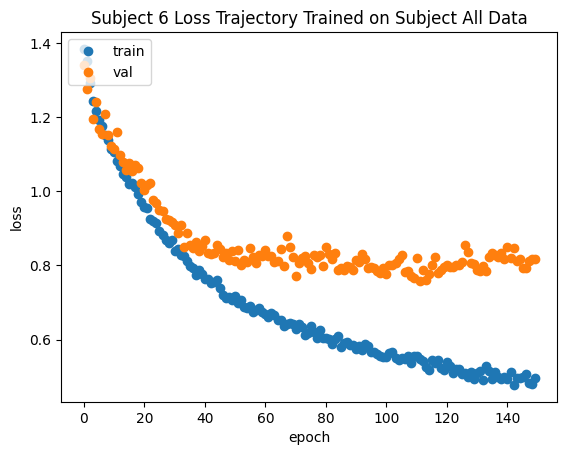

Test accuracy of the hybrid CNN-LSTM model: 0.7200000286102295
(232, 22, 1000)
(232,)
(50, 22, 1000)
(50,)
(1883, 22, 1000)
(1883,)
(1883, 22, 1000)
(1883,)


(7056, 400, 1, 22)
(1404, 400, 1, 22)
(7056, 4)
(1404, 4)
Epoch 1/150
111/111 [==============================] - 8s 57ms/step - loss: 1.3642 - accuracy: 0.3041 - val_loss: 1.3344 - val_accuracy: 0.3597
Epoch 2/150
111/111 [==============================] - 6s 55ms/step - loss: 1.3159 - accuracy: 0.3583 - val_loss: 1.2526 - val_accuracy: 0.4259
Epoch 3/150
111/111 [==============================] - 6s 55ms/step - loss: 1.2638 - accuracy: 0.4093 - val_loss: 1.2233 - val_accuracy: 0.4188
Epoch 4/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2247 - accuracy: 0.4330 - val_loss: 1.1920 - val_accuracy: 0.4423
Epoch 5/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2045 - accuracy: 0.4529 - val_loss: 1.2176 - val_accuracy: 0.4494
Epoch 6/150
111/111 [==============================] - 54s 489ms/step - loss: 1.1841 - accuracy: 0.4619 - val_loss: 1.2205 - val_accuracy: 0.4245
Epoch 7/150
111/111 [==============================] - 6s 58ms/step - loss: 

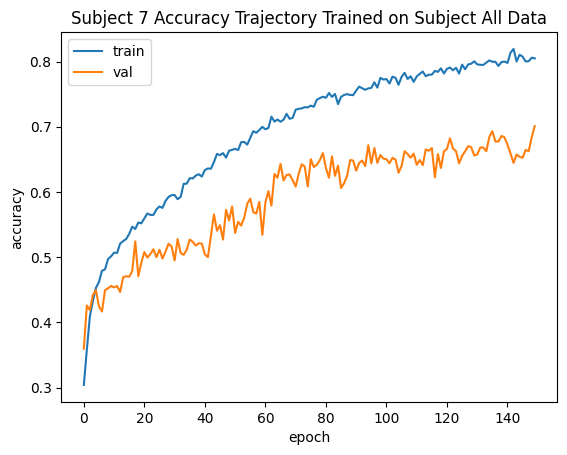

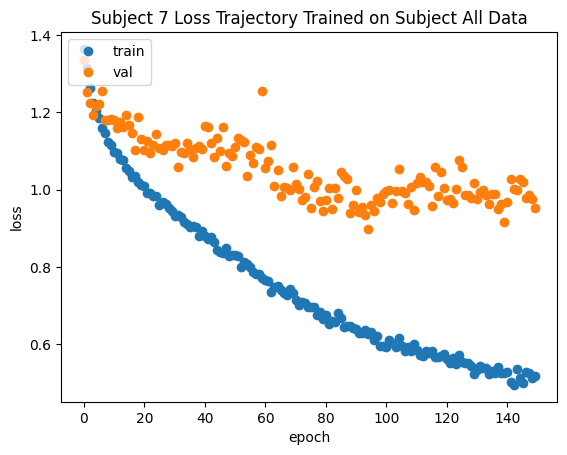

Test accuracy of the hybrid CNN-LSTM model: 0.7200000286102295
(231, 22, 1000)
(231,)
(47, 22, 1000)
(47,)
(1884, 22, 1000)
(1884,)
(1884, 22, 1000)
(1884,)


(7052, 400, 1, 22)
(1408, 400, 1, 22)
(7052, 4)
(1408, 4)
Epoch 1/150
111/111 [==============================] - 8s 57ms/step - loss: 1.3814 - accuracy: 0.2847 - val_loss: 1.3524 - val_accuracy: 0.3480
Epoch 2/150
111/111 [==============================] - 6s 58ms/step - loss: 1.3439 - accuracy: 0.3419 - val_loss: 1.3384 - val_accuracy: 0.3480
Epoch 3/150
111/111 [==============================] - 6s 57ms/step - loss: 1.2959 - accuracy: 0.3839 - val_loss: 1.3359 - val_accuracy: 0.3345
Epoch 4/150
111/111 [==============================] - 6s 57ms/step - loss: 1.2599 - accuracy: 0.4169 - val_loss: 1.2443 - val_accuracy: 0.4276
Epoch 5/150
111/111 [==============================] - 6s 56ms/step - loss: 1.2251 - accuracy: 0.4312 - val_loss: 1.2323 - val_accuracy: 0.4332
Epoch 6/150
111/111 [==============================] - 6s 55ms/step - loss: 1.1892 - accuracy: 0.4620 - val_loss: 1.2228 - val_accuracy: 0.4311
Epoch 7/150
111/111 [==============================] - 6s 56ms/step - loss: 1.

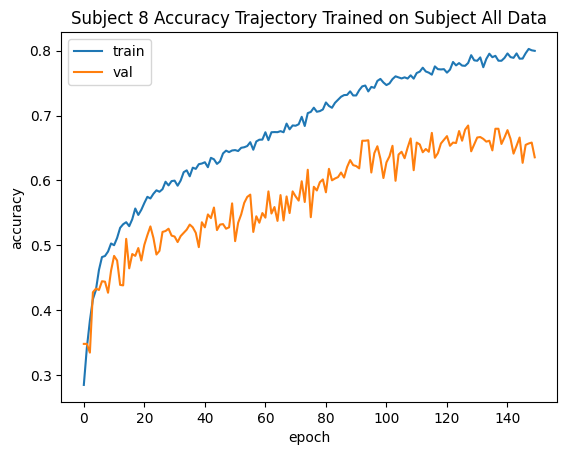

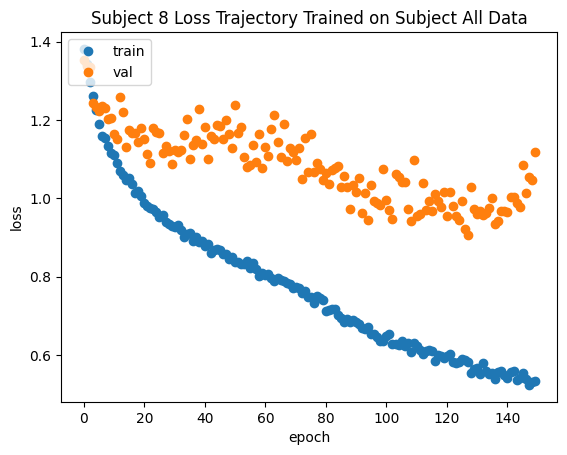

Test accuracy of the hybrid CNN-LSTM model: 0.7234042286872864


In [13]:
for id in range(9):
    subject_train_valid_ind = np.where(person_train_valid == id)
    subject_train_valid_ind = subject_train_valid_ind[0]
    subject_X_train_valid = X_train_valid[subject_train_valid_ind]
    subject_y_train_valid = y_train_valid[subject_train_valid_ind]
    subject_test_ind = np.where(person_test == id)
    subject_test_ind = subject_test_ind[0]
    subject_X_test = X_test[subject_test_ind]
    subject_y_test = y_test[subject_test_ind]
    print(np.shape(subject_X_train_valid))
    print(np.shape(subject_y_train_valid))
    print(np.shape(subject_X_test))
    print(np.shape(subject_y_test))

    rest_train_valid_ind = np.setdiff1d(np.arange(len(person_train_valid)), subject_train_valid_ind)
    rest_X_train_valid = X_train_valid[rest_train_valid_ind]
    rest_y_train_valid = y_train_valid[rest_train_valid_ind]
    print(np.shape(rest_X_train_valid))
    print(np.shape(rest_y_train_valid))

    subject_X_test_prep = test_data_prep(subject_X_test) 
    ind_valid = np.random.choice(len(subject_X_train_valid), int(np.floor(len(subject_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(subject_X_train_valid))).difference(set(ind_valid))))
    (subject_x_train_split, subject_x_valid_split) = subject_X_train_valid[ind_train], subject_X_train_valid[ind_valid] 
    (subject_y_train_split, subject_y_valid_split) = subject_y_train_valid[ind_train], subject_y_train_valid[ind_valid]
    subject_x_train,subject_y_train = train_data_prep(subject_x_train_split,subject_y_train_split,2,2,True)
    subject_x_valid,subject_y_valid = train_data_prep(subject_x_valid_split,subject_y_valid_split,2,2,True)
    subject_y_train = to_categorical(subject_y_train, 4)
    subject_y_valid = to_categorical(subject_y_valid, 4)
    subject_y_test = to_categorical(subject_y_test, 4)
    subject_x_train = subject_x_train.reshape(subject_x_train.shape[0], subject_x_train.shape[1], subject_x_train.shape[2], 1)
    subject_x_valid = subject_x_valid.reshape(subject_x_valid.shape[0], subject_x_valid.shape[1], subject_x_train.shape[2], 1)
    subject_x_test = subject_X_test_prep.reshape(subject_X_test_prep.shape[0], subject_X_test_prep.shape[1], subject_X_test_prep.shape[2], 1)
    subject_x_train = np.swapaxes(subject_x_train, 1,3)
    subject_x_train = np.swapaxes(subject_x_train, 1,2)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,3)
    subject_x_valid = np.swapaxes(subject_x_valid, 1,2)
    subject_x_test = np.swapaxes(subject_x_test, 1,3)
    subject_x_test = np.swapaxes(subject_x_test, 1,2)

    print(np.shape(rest_X_train_valid))
    print(np.shape(rest_y_train_valid))
    ind_valid = np.random.choice(len(rest_X_train_valid), int(np.floor(len(rest_X_train_valid)/6)), replace=False)
    ind_train = np.array(list(set(range(len(rest_X_train_valid))).difference(set(ind_valid))))
    (rest_x_train_split, rest_x_valid_split) = rest_X_train_valid[ind_train], rest_X_train_valid[ind_valid] 
    (rest_y_train_split, rest_y_valid_split) = rest_y_train_valid[ind_train], rest_y_train_valid[ind_valid]
    rest_x_train,rest_y_train = train_data_prep(rest_x_train_split,rest_y_train_split,2,2,True)
    rest_x_valid,rest_y_valid = train_data_prep(rest_x_valid_split,rest_y_valid_split,2,2,True)
    rest_y_train = to_categorical(rest_y_train, 4)
    rest_y_valid = to_categorical(rest_y_valid, 4)
    rest_x_train = rest_x_train.reshape(rest_x_train.shape[0], rest_x_train.shape[1], rest_x_train.shape[2], 1)
    rest_x_valid = rest_x_valid.reshape(rest_x_valid.shape[0], rest_x_valid.shape[1], rest_x_train.shape[2], 1)
    rest_x_train = np.swapaxes(rest_x_train, 1,3)
    rest_x_train = np.swapaxes(rest_x_train, 1,2)
    rest_x_valid = np.swapaxes(rest_x_valid, 1,3)
    rest_x_valid = np.swapaxes(rest_x_valid, 1,2)
    combined_x_train = np.vstack([rest_x_train, subject_x_train])
    combined_x_valid = np.vstack([rest_x_valid, subject_x_valid])
    combined_y_train = np.vstack([rest_y_train, subject_y_train])
    combined_y_valid = np.vstack([rest_y_valid, subject_y_valid])

    print(np.shape(combined_x_train))
    print(np.shape(combined_x_valid))
    print(np.shape(combined_y_train))
    print(np.shape(combined_y_valid))

    hybrid_cnn_lstm_model = hybrid()
    # ADAM
    # Compiling the model
    hybrid_cnn_lstm_optimizer = keras.optimizers.Adam(lr=learning_rate)
    hybrid_cnn_lstm_model.compile(loss='categorical_crossentropy',
                    optimizer=hybrid_cnn_lstm_optimizer,
                    metrics=['accuracy'])

    # Training and validating the model
    hybrid_cnn_lstm_model_results = hybrid_cnn_lstm_model.fit(combined_x_train,
                combined_y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(combined_x_valid, combined_y_valid), verbose=True)

    # Plotting accuracy trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['accuracy'])
    plt.plot( hybrid_cnn_lstm_model_results.history['val_accuracy'])
    plt.title('Subject ' + str(id) + ' Accuracy Trajectory Trained on Subject All Data')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting loss trajectory
    plt.plot( hybrid_cnn_lstm_model_results.history['loss'],'o')
    plt.plot( hybrid_cnn_lstm_model_results.history['val_loss'],'o')
    plt.title('Subject '  + str(id) + ' Loss Trajectory Trained on Subject All Data')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    hybrid_cnn_lstm_score = hybrid_cnn_lstm_model.evaluate(subject_x_test, subject_y_test, verbose=0)
    print('Test accuracy of the hybrid CNN-LSTM model:',hybrid_cnn_lstm_score[1])
    